In [1]:
import pandas as pd
fn = r'C:\Users\zerot\Desktop\python\busVisSystem\metadata\TBIS_MS_ROUTE_NODE.csv'
df_rn = pd.read_csv(fn, encoding='utf-8-sig')

fn =  r'C:\Users\zerot\Desktop\python\busVisSystem\metadata\TBIS_MS_STTN.csv'
df_s = pd.read_csv(fn, encoding='utf-8-sig')

fn = r'C:\Users\zerot\Desktop\python\busVisSystem\metadata\TBIS_MS_ROUTE.csv'
df_r = pd.read_csv(fn, encoding='utf-8-sig')

In [7]:
target_routeId = df_r['ROUTE_ID'][df_r['ROUTE_NM']=='660'].tolist()[0]
print(target_routeId)


116000004


In [ ]:
stn_list = df_rn['STTN_ID'][df_rn['ROUTE_ID']== target_routeId].tolist()


In [9]:
df = pd.DataFrame({'STTN_ID': stn_list})
df_merged = pd.merge(df, df_s, how='left', on='STTN_ID')

In [ ]:
import folium
m = folium.Map(location=[df_merged['CRDNT_Y'].mean(),  df_merged['CRDNT_X'].mean()], zoom_start=12)
for idx, row in df_merged.iterrows():
    folium.CircleMarker(
        location=[row['CRDNT_Y'], row['CRDNT_X']],  # (lat, lon)
        radius=3,  # 반경 크기
        color="blue",  # 원의 색상
        fill=True,  # 채우기 여부
        fill_color="blue",  # 채우기 색상
        fill_opacity=0.7,  # 채우기 투명도
        popup=f"Calc:({idx})"  # 마커를 클릭했을 때 표시될 텍스트
    ).add_to(m)
m

<Axes: >

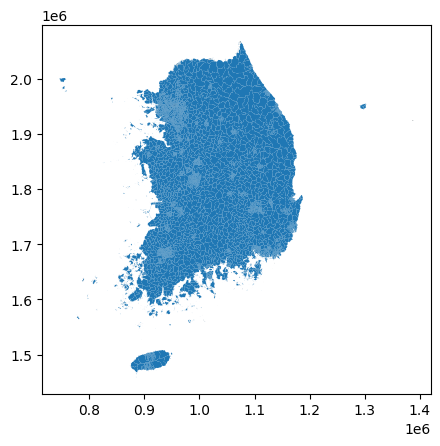

In [24]:
import geopandas as gpd

fn = r'C:\Users\zerot\Desktop\python\busVisSystem\data\읍면동\emd.shp'
gdf = gpd.read_file(fn, encoding='cp949')
gdf.plot()

In [25]:
gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5061,52800380,Baeksan-myeon,백산면,"POLYGON ((934492.435 1747398.266, 934498.181 1..."
5062,52800390,Sangseo-myeon,상서면,"POLYGON ((924979.638 1740610.214, 924985.428 1..."
5063,52800400,Haseo-myeon,하서면,"POLYGON ((924910.563 1749481.985, 924971.3 174..."
5064,52800410,Julpo-myeon,줄포면,"POLYGON ((929554.188 1736493.399, 929554.106 1..."
